In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")
img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

In [61]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
# blur = cv2.medianBlur(gray,11)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

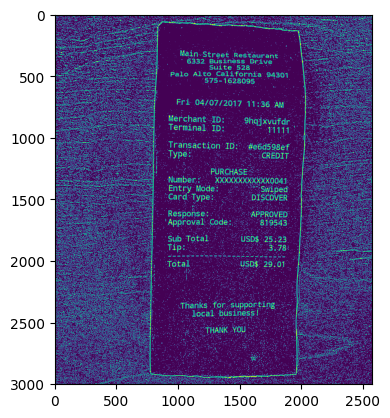

In [62]:
plt.imshow(thresh)
plt.show()

51151


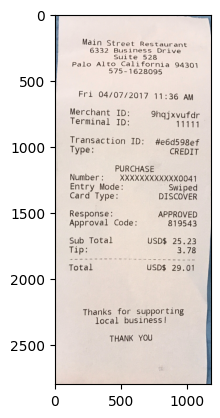

In [66]:
result = img.copy()
canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
sort = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y+50:y+h-50, x+50:x+w-50]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

CODE for image stitching


In [95]:
cap = cv2.VideoCapture(1)
shot = []
while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        shot.append(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [97]:
len(shot)

2

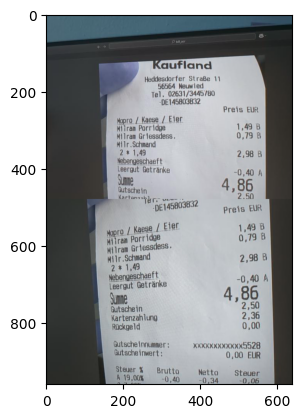

In [98]:
merge = cv2.vconcat(shot)
plt.imshow(merge)
plt.show()

In [67]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [68]:
print(pytesseract.image_to_string(result))

Main Street Restaurant
6332 Business Drive
Suite 528

Palo Alto California 94301
975~-1628095

Fri 04/07/2017 11:36 AM
Merchant ID: 9hqjxvufdr

Terminal ID: OGY
Transaction ID: #e6d598ef
Type: CREDIT
PURCHASE
Number : XXXXXXXXXXXXO04 1
Entry Mode: Swiped
Card Type: DISCOVER
Response: APPROVED
Approval Code: 819543
Sub Total USD$ 25.23
pe 3.78
Total USD$ 29.01

Thanks for supporting
local business!

THANK YOU



In [107]:
flag = 'kaufland'

In [108]:
text = pytesseract.image_to_string(result)
text = text.split()
if flag == 'kaufland':

    for index, i in enumerate(text):
        # print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

In [70]:
df = pd.DataFrame(columns=['Contributor','Shop','Date', 'Cost'])
centers = ['Kaufland', 'TEDI', 'LiDL']

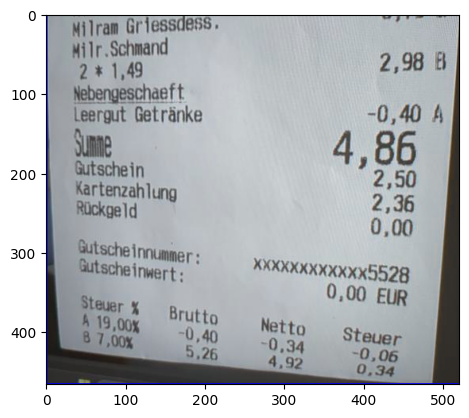

NameError: name 'num' is not defined

In [108]:
cap = cv2.VideoCapture(1)
i = 0
flag = 'kaufland'
shot = []
total = []
while True:
    i=i+1
    ret, frame = cap.read()
    
    cv2.imshow("frame", frame)
    # if i>100:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    # thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
    result = frame.copy()
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(len(contours))
    sort = sorted(contours, key=lambda x: cv2.contourArea(x))
    x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
    cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    result = result[y:y+h, x:x+w]
    text = pytesseract.image_to_string(result)
    text = text.split()
    total = total + text 
    # print(text)
    
    # if flag == 'kaufland':
    
        # else:
        #     date = "not found"
        
    
        

    #         # print(i)
            

    #         if i == 'Summe':
    #             print(i)
    #             break
    # print(text[index+1])
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        shot.append(result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        plt.imshow(result)
        plt.show()
        break
cap.release()
cv2.destroyAllWindows()
merge = cv2.vconcat(shot)

for i in range(len(text)):
        
    if text[i] in centers:
        shop = text[i]
    # else:
    #     shop = "not found"


    if text[i] == 'Summe':
    # print(text[i+1])
        num = text[i+1]
    # else:
    #     num = "not found"


    if text[i] == 'Datum':
        date = text[i+1]
contributor = 'Muthu'

Shop = shop
date = date
cost = num

df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

In [109]:
total

['aufland',
 'Headesuor',
 'fer',
 'StraBe',
 '1}',
 '364',
 'Neuw',
 'ied',
 '1',
 'Tel.',
 '02631/34457980',
 'DE145803832',
 'aufland',
 'Heddesdorfer',
 'Strage',
 'in|',
 '56564',
 'Neuwied',
 'Tel.',
 '02631/3445780',
 '-DE145803832',
 'Preis',
 'EUR',
 'ese',
 '/',
 'Eier',
 'ram',
 'Porridge',
 '1,49',
 '8',
 'Tram',
 'Griessdess',
 ',',
 '0.79',
 '4',
 'aufland',
 'Heddesdorfer',
 'StraBe',
 '11',
 '56564',
 'Neuwled',
 'Te).',
 '02631/3445780',
 '-DE145803832',
 'Preis',
 'EUR',
 'Mopro',
 '/',
 'Kaese',
 '/',
 'Eier',
 'wives',
 'Porridge',
 '1,49',
 'Milram',
 'Griessdess',
 '0,79',
 '8',
 'Mats',
 'Onlmanl',
 'aufland',
 'Heddesdorfer',
 'StraBe',
 '11',
 '56564',
 'Neuwled',
 'Tel.',
 'Rant',
 '-DE145803832',
 'e',
 '/',
 'Eler',
 'ridge',
 '1,49',
 '8',
 'riessdess',
 '.',
 '0,79',
 '8',
 'a',
 'nan',
 'ow',
 'Preis',
 'EUR',
 'aufland',
 'Heddesdorfer',
 'StraBe',
 '11',
 '56564',
 'Neuwied',
 'Tel.',
 '02631/3445/80',
 '-DE145803832',
 'Preis',
 'EUR',
 '/',
 'Kaese',


In [85]:
date

':06.12.23'

In [107]:
len(shot)

1

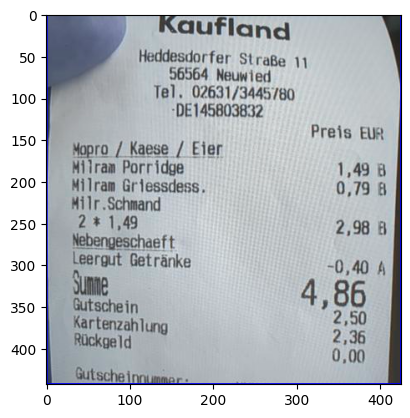

In [101]:
plt.imshow(merge)
plt.show()

In [100]:
text

['Kaufland',
 'Heddesdorfer',
 'StraBe',
 '11',
 '56564',
 'Neuwied',
 'Tel.',
 '02631/3445780',
 '~DE145803832',
 'Preis',
 'EUR',
 'Mopro',
 '/',
 'Kaese',
 '/',
 'Eler',
 '/',
 'Milram',
 'Porridge',
 '1,49',
 '8',
 'Milram',
 'Griessdess,',
 '0,79',
 '&',
 'Milr.Schmand',
 '2*',
 '1,49',
 '2,98',
 '8',
 'Nebengeschaeft',
 'Leergut',
 'Getranke',
 '-0,40',
 '4',
 'si',
 '4,86',
 'Kartenzahlung',
 '2.36',
 'Rickgeld',
 '0/00',
 'Gutscheinnumacr.']

In [15]:
df.to_csv('sheet.csv')

In [36]:
a = 'Kaufland'
if a in centers:
    print(a)

Kaufland


In [13]:
df

,Contributor,Shop,Date,Cost


In [24]:
contributor = 'hi'
Shop = 'kaufland'
date = '31/08/2024'
cost = num

In [22]:
# df = df.concat([df, pd.DataFrame({'Contributor': contributor , 'Shop': Shop, 'Date': date, 'Cost': num})], ignore_index = True)
# print(df)


  Contributor      Shop        Date  Cost
0       Muthu  kaufland  31/08/2024  3,90


In [23]:
df

,Contributor,Shop,Date,Cost
0,Muthu,kaufland,31/08/2024,"3,90"


In [25]:
df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

  Contributor      Shop        Date  Cost
0       Muthu  kaufland  31/08/2024  3,90
1          hi  kaufland  31/08/2024  3,90
